In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
from astropy.modeling import models,fitting

In [2]:
df = pd.read_csv('Voigt.csv')

In [3]:
from scipy.signal import chirp, find_peaks, peak_widths
X = np.arange(start = -30, stop = 30, step = 0.005)

/home/david/anaconda3/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


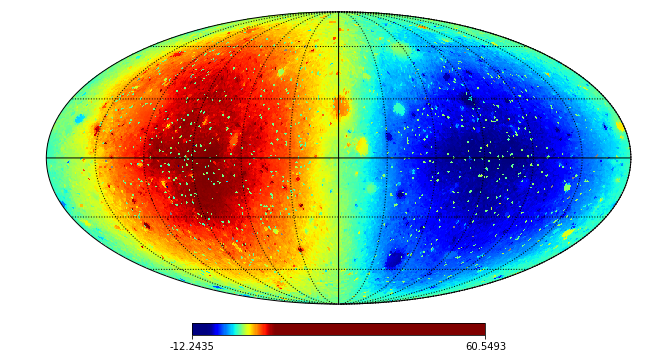

In [6]:
hp.mollview(
    df['x0'].values,
    title = '',
    cmap = 'jet',
    norm = 'hist'
)
hp.graticule()
plt.savefig('Energy_shift.png')

In [9]:
import matplotlib as mpl
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=-10, vmax=60)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, spacing = 'proportional')

hp.mollview(
    df['x0'].values,
    #coord="G",
    title = '',
    #unit = r'10$^{-4}$ v/(c+v)',
    #norm = 'hist',
    cmap=cb1
)
hp.graticule()
#cb1.set_label('Some Units')
#plt.savefig('Voigt_Shift.png')

NameError: name 'ax' is not defined

In [4]:
width = []
error = []
Loz = []
for i in range(len(df)):
    if i%5000 == 0:
        print(i)
    tmp = df.iloc[i][3]
    popt = np.array(df.iloc[i][2:])
    f = models.Voigt1D(*popt)
    Y = f(X)
    
    peaks, _ = find_peaks(Y)
    results_half = peak_widths(Y, peaks, rel_height=0.5)
    width.append(results_half[0]*0.005)  

0
5000
10000
15000
20000
25000
30000
35000
40000
45000


In [5]:
W = []
error=[]
for i in range(len(width)):
    try:
        if len(width[i]) != 1:       
            error.append(i)
            W.append(0)
        else:
            W.append(width[i][0])
    except:
        W.append(0)
        error.append(i)

In [6]:
a = np.array(W)
flag  = 0
fa = 0
for i in range(len(a)):
    if a[i] < 3.5:
        flag +=1
    elif a[i]>8.5:
        fa +=1
    else:
        pass

In [7]:
for i in range(len(W)):
    if W[i] <= 3.5:
        W[i] = 3.5
    elif W[i] > 9:
        W[i] = 9
    else:
        pass

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


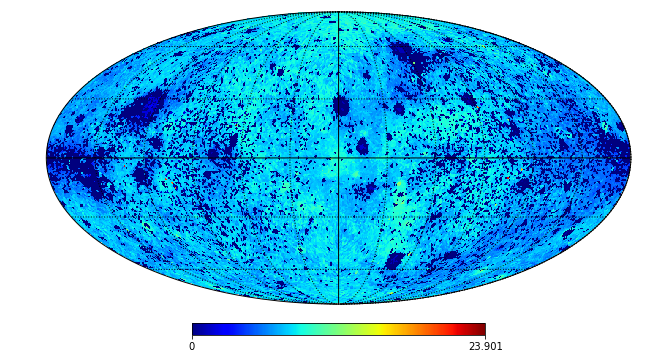

In [11]:
hp.mollview(
    a,
    title = '',
    cmap='jet'
)
hp.graticule()
plt.savefig('Voigt_Width.png')

In [15]:
df.sort_values(by='hp_pix', inplace = True)
dEMap = df['dE'].values

/home/david/anaconda3/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/david/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1184: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/david/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1185: RuntimeWarning: invalid value encountered in greater
  result.data[result.data > 1] = 1.0


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


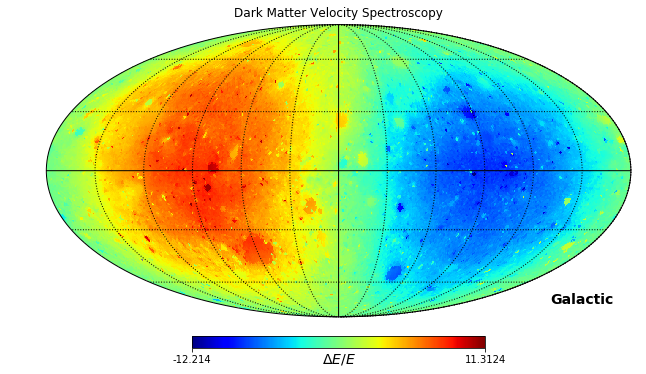

In [16]:
hp.mollview(
    dEMap,
    coord="G",
    title = 'Dark Matter Velocity Spectroscopy',
    unit = r'$\Delta E/E$',
    cmap='jet'
)
hp.graticule()
plt.savefig('Velocity Spectroscopy.png')